In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [7]:
sns.set(style="whitegrid")

q2_df = pd.read_excel('cluster_results_percentages.xlsx')
q2_df.set_index(q2_df.columns[0], inplace=True)

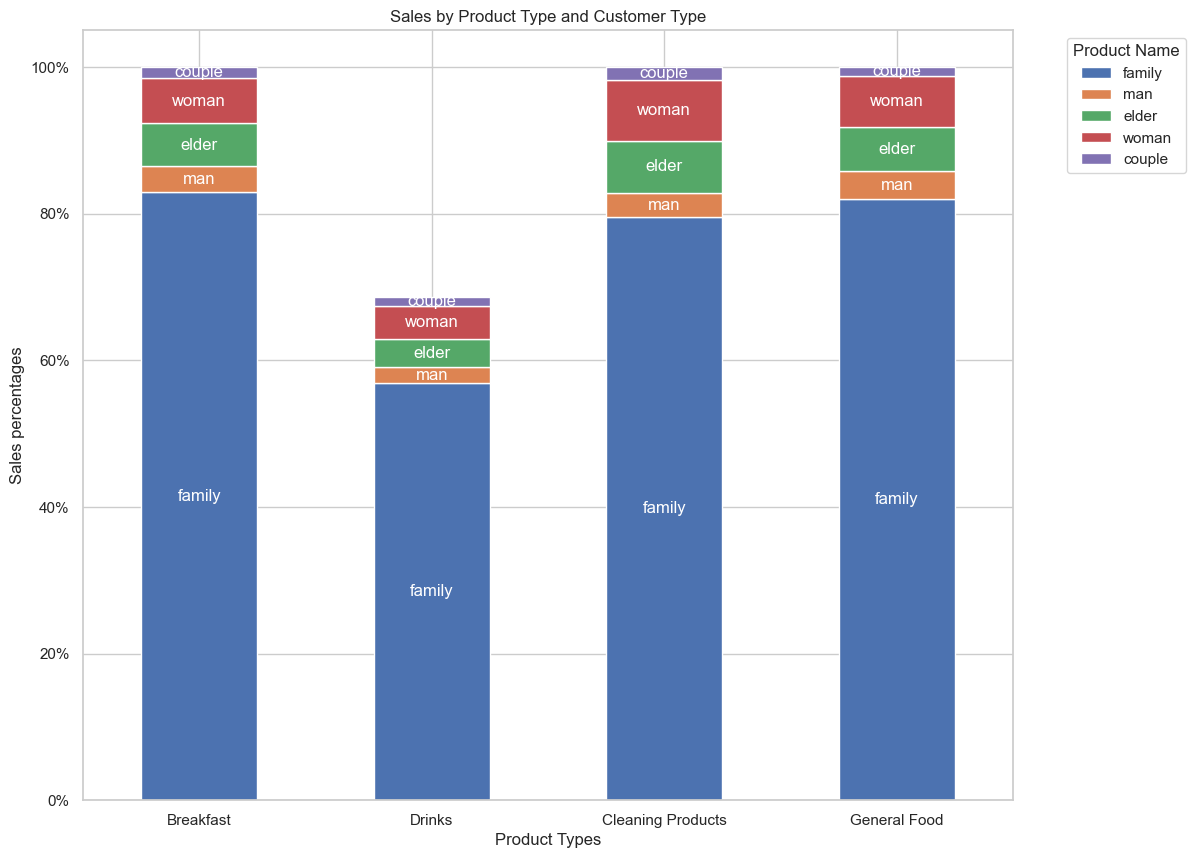

In [16]:
q2_df = q2_df.iloc[:10, :]

df_transposed = q2_df.transpose()

ax = df_transposed.plot(kind='bar', stacked=True, figsize=(12, 10))  # Plotting the stacked bar chart
formatter = FuncFormatter(lambda x, _: f'{x*100:.0f}%')  # Format y-axis labels as percentages
ax.yaxis.set_major_formatter(formatter)


k=0
for i, p in enumerate(ax.patches):
    # Get the height of the current bar segment
    height = p.get_height()
    
    if height > 0:  # Only label non-zero segments
        # Calculate the row (product) and column (season) indices
        product_index = i % len(df_transposed.columns)  # We cycle through the products for each stack
        season_index = i // len(df_transposed.columns)  # Each full cycle represents one season
        
        # Get the corresponding product name
        product = q2_df.index[k]
        
        if ((i + 1) % 4 == 0):
            k += 1
        
        # Calculate the x and y position for the label
        x = p.get_x() + p.get_width() / 2  # Center of the bar
        y = p.get_y() + height / 2         # Middle of the bar segment
        
        # Add the product label to the bar segment
        ax.text(x, y, product, ha='center', va='center', color='white', fontsize=12)


# formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
# ax.yaxis.set_major_formatter(formatter)

# Step 4: Customize the plot
plt.title('Sales by Product Type and Customer Type')
plt.xlabel('Product Types')
plt.ylabel('Sales percentages')
plt.xticks(rotation=0)  # Rotate the x-axis labels (season names)
plt.legend(title="Product Name", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

In [4]:
display(q2_df)

,Breakfast,Drinks,Cleaning Products,General Food
Unnamed: 0,,,,
family,0.829133,0.568493,0.795368,0.819841
man,0.035391,0.021537,0.032944,0.037547
elder,0.058411,0.038342,0.071059,0.061237
woman,0.061542,0.046180,0.082977,0.069023
couple,0.015523,0.011792,0.017652,0.012352
